In [141]:
import torch

In [142]:
torch.zeros((2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [143]:
y_pred = torch.tensor([1,2,9.0], requires_grad=True)

In [144]:
y_pred

tensor([1., 2., 9.], requires_grad=True)

In [145]:
y = torch.tensor([0,0,0.0], requires_grad=False)

In [146]:
loss = ((y - y_pred) ** 2).mean()

In [147]:
loss

tensor(28.6667, grad_fn=<MeanBackward0>)

In [148]:
loss.backward()

In [149]:
y_pred.grad

tensor([0.6667, 1.3333, 6.0000])

In [150]:
y_pred

tensor([1., 2., 9.], requires_grad=True)

In [151]:
from torch.optim import SGD, Adam

In [152]:
optimizer = SGD([y_pred], lr=0.1)

In [153]:
optimizer.step()

In [154]:
y_pred

tensor([0.9333, 1.8667, 8.4000], requires_grad=True)

In [180]:
from sklearn.datasets import load_breast_cancer

In [181]:
X, y = load_breast_cancer(return_X_y=True)

In [182]:
X.shape, y.shape

((569, 30), (569,))

In [183]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [186]:
from torch.nn.functional import relu, sigmoid

In [ ]:
class OurNN(torch.nn.Module):
    def __init__(self, in_features: int):
        super().__init__()
        self.layer1 = torch.nn.Linear(in_features=in_features, out_features=64)
        self.layer2 = torch.nn.Linear(in_features=64, out_features=1)

    def forward(self, x):
        h = relu(self.layer1(x))
        y = sigmoid(self.layer2(h))
        # ako radimo regresiju, samo obrisemo sigmoid i loss je npr. mse
        # ako radimo viseklasnu klasifikaciju, umesto sigmoid koristimo softmax
        return y

In [188]:
model = OurNN(in_features=X.shape[1])

In [189]:
from torch.utils.data import Dataset, DataLoader

In [190]:
class OurDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return len(self.y)

In [191]:
train_dataset = OurDataset(X_train, y_train)

In [192]:
train_dataset[-1]

(tensor([1.4680e+01, 2.0130e+01, 9.4740e+01, 6.8450e+02, 9.8670e-02, 7.2000e-02,
         7.3950e-02, 5.2590e-02, 1.5860e-01, 5.9220e-02, 4.7270e-01, 1.2400e+00,
         3.1950e+00, 4.5400e+01, 5.7180e-03, 1.1620e-02, 1.9980e-02, 1.1090e-02,
         1.4100e-02, 2.0850e-03, 1.9070e+01, 3.0880e+01, 1.2340e+02, 1.1380e+03,
         1.4640e-01, 1.8710e-01, 2.9140e-01, 1.6090e-01, 3.0290e-01, 8.2160e-02]),
 tensor(0.))

In [193]:
len(train_dataset)

455

In [194]:
train_dataloader = DataLoader(train_dataset, batch_size=16)

In [195]:
for X, y in train_dataloader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([16, 30])
torch.Size([16])


In [196]:
from torch.nn.functional import binary_cross_entropy

In [197]:
from torch.optim import Adam

In [198]:
optimizer = Adam(model.parameters())

In [199]:
num_epochs = 10

In [200]:
for epoch in range(num_epochs):
    for X, y in train_dataloader:
        y_pred = model(X).squeeze()
        loss = binary_cross_entropy(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [206]:
test_dataset = OurDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [211]:
len(test_dataset)

114

In [212]:
from sklearn.metrics import accuracy_score

In [213]:
with torch.no_grad():
    y_preds = torch.tensor([])
    for X, y in test_dataloader:
        y_pred = model(X).squeeze()
        y_pred_round = y_pred > 0.5
        y_preds = torch.cat((y_preds, y_pred_round))
    print(y_preds.shape)
    print(accuracy_score(y_test, y_preds))

torch.Size([114])
0.868421052631579


In [20]:
from torchvision import datasets, transforms

In [21]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [22]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [23]:
img, y = train_dataset[1]

In [24]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, '0')

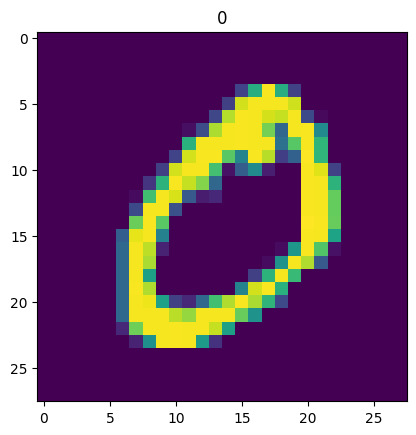

In [25]:
plt.imshow(img.squeeze())
plt.title(y)

In [26]:
img.shape

torch.Size([1, 28, 28])

In [27]:
img.squeeze().shape

torch.Size([28, 28])

In [28]:
img.unsqueeze(-1).shape

torch.Size([1, 28, 28, 1])

In [29]:
from torch.utils.data import DataLoader

In [30]:
train_dataloader = DataLoader(train_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [31]:
from torch import nn

In [32]:
img.flatten().shape

torch.Size([784])

In [33]:
img.reshape(-1, 1).shape

torch.Size([784, 1])

In [34]:
from torch.nn.functional import relu

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.pooling = nn.MaxPool2d(kernel_size=2)
        self.linear = nn.Linear(in_features=12*12*64, out_features=10)

    def forward(self, x):
        if self.training:
            
            # print(x.shape)
            x = relu(self.conv1(x))
            # print(x.shape)
            x = relu(self.conv2(x))
            # print(x.shape)
            x = self.pooling(x)
            # print(x.shape)
            batch_size = x.shape[0]
            return self.linear(x.reshape(batch_size, -1)) # ne treba nam softmax, jer cross_entropy loss ocekuje raw logits
        else:
            return 0

In [56]:
model = ConvNet()

In [57]:
from torch.nn.functional import cross_entropy

In [58]:
loss_fn = cross_entropy

In [59]:
num_epochs = 1

In [60]:
from torch.optim import Adam

In [61]:
optimizer = Adam(params=model.parameters(), lr=3e-4)

In [62]:
from tqdm import tqdm

In [63]:
for epoch in range(num_epochs):
    for X, y in tqdm(train_dataloader):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

100%|██████████| 1875/1875 [00:51<00:00, 36.39it/s]


In [64]:
import torch

In [65]:
from sklearn.metrics import accuracy_score

In [ ]:
model.eval()
with torch.no_grad():
    y_preds = torch.tensor([])
    y_test = torch.tensor([])
    for X, y in test_dataloader:
        y_pred = model(X).squeeze()
        y_pred_idx = y_pred.argmax(dim=1)
        y_preds = torch.cat((y_preds, y_pred_idx))
        y_test = torch.cat((y_test, y))
    print(y_preds.shape)
    print(accuracy_score(y_test, y_preds))

torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([3

In [103]:
model.training

True

In [104]:
model.train()

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=9216, out_features=10, bias=True)
)

In [105]:
import random


class OurDropout(nn.Module):
    def __init__(self, p: float):
        super().__init__()
        self.p = p

    def forward(self, x):
        if self.training and random.random() < self.p:
            return 0
        else:
            return x